In [1]:
import os
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing csv file to notebook
tarantino_movies = pd.read_csv("tarantino.csv")

In [3]:
tarantino_movies

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
5,Reservoir Dogs,word,fuck,0.66
6,Reservoir Dogs,word,shit,0.90
7,Reservoir Dogs,word,fuck,1.43
8,Reservoir Dogs,word,dicks,1.56
9,Reservoir Dogs,word,fuck,1.66


In [4]:
# Creating an sql database
tarantino_movies.to_sql('tarantino_movies', sqlite3.connect('tarantino.db'), if_exists = "replace")

In [5]:
# connectiong to SQL database
con = sqlite3.connect('tarantino.db')
# Calling database
tarantino_movies

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
5,Reservoir Dogs,word,fuck,0.66
6,Reservoir Dogs,word,shit,0.90
7,Reservoir Dogs,word,fuck,1.43
8,Reservoir Dogs,word,dicks,1.56
9,Reservoir Dogs,word,fuck,1.66


### Lets remove all the deaths and just have a database with words. 

In [6]:
words = pd.read_sql_query("SELECT movie, type, word FROM tarantino_movies WHERE type = 'word'", con);

In [7]:
words

,movie,type,word
0,Reservoir Dogs,word,dick
1,Reservoir Dogs,word,dicks
2,Reservoir Dogs,word,fucked
3,Reservoir Dogs,word,fucking
4,Reservoir Dogs,word,bullshit
5,Reservoir Dogs,word,fuck
6,Reservoir Dogs,word,shit
7,Reservoir Dogs,word,fuck
8,Reservoir Dogs,word,dicks
9,Reservoir Dogs,word,fuck


In [8]:
# Creating an sql database
words.to_sql('words', sqlite3.connect('words.db'), if_exists = "replace")

In [9]:
# connectiong to SQL database
con = sqlite3.connect('words.db')
# Calling database
words

,movie,type,word
0,Reservoir Dogs,word,dick
1,Reservoir Dogs,word,dicks
2,Reservoir Dogs,word,fucked
3,Reservoir Dogs,word,fucking
4,Reservoir Dogs,word,bullshit
5,Reservoir Dogs,word,fuck
6,Reservoir Dogs,word,shit
7,Reservoir Dogs,word,fuck
8,Reservoir Dogs,word,dicks
9,Reservoir Dogs,word,fuck


## Now that we have imported our csv file and created an SQLite database, and narrowed our database to only words, let's find out a few questions. 

### Question 1: Which word is used in Quentin Tarantino movies the most??

In [31]:
most = pd.read_sql_query("SELECT word, COUNT(word) AS Totals FROM words GROUP BY word", con);

In [32]:
most

,word,Totals
0,ass,140
1,asses,4
2,asshead,1
3,asshole,10
4,assholes,5
5,bastard,10
6,bastards,1
7,bitch,63
8,bitches,9
9,bullshit,15


Text(0, 0.5, 'Total number of each word')

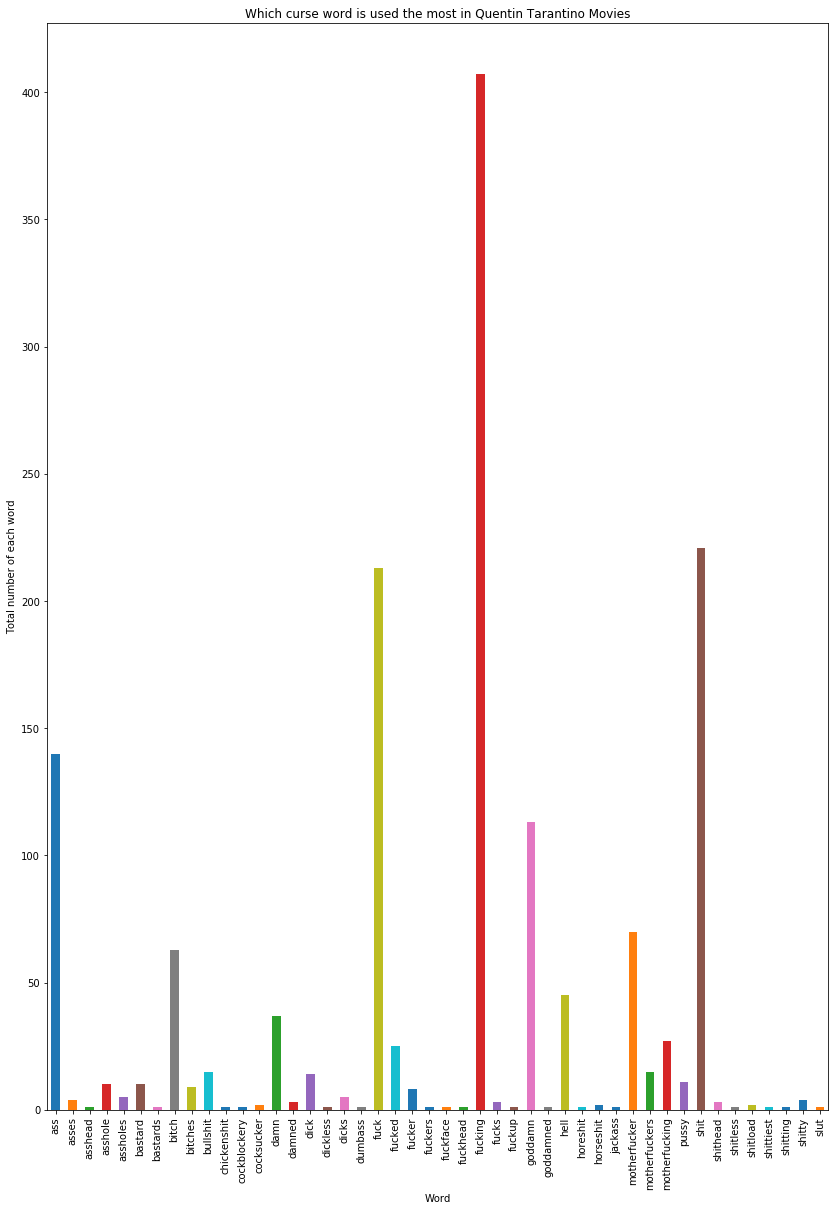

In [37]:
my_plot = most.plot(kind='bar', x='word', y='Totals', legend=None,title="Which curse word is used the most in Quentin Tarantino Movies", figsize=(14,20))
my_plot.set_xlabel("Word")
my_plot.set_ylabel("Total number of each word")



### Well, it looks like Tarantino is a huge fan of the word, fucking, followed by shit and fuck!

# Let's look at some other questions. Here's one, which Tarantino movie has the most curse words in it? My guess, Jackie Brown!!??

In [49]:
movies = pd.read_sql_query("SELECT movie, COUNT(movie) AS Totals FROM words GROUP BY movie", con);

In [50]:
movies

,movie,Totals
0,Django Unchained,147
1,Inglorious Basterds,52
2,Jackie Brown,329
3,Kill Bill: Vol. 1,55
4,Kill Bill: Vol. 2,65
5,Pulp Fiction,442
6,Reservoir Dogs,413


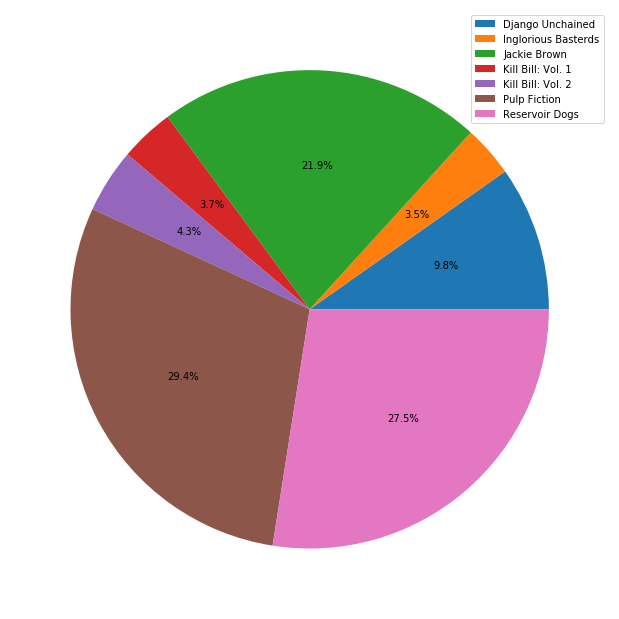

In [55]:
plt.figure(figsize = (11, 11))
x = movies.Totals
plt.pie(x, autopct='%1.1f%%')
plt.legend(labels = movies.movie, loc='upper right')
plt.show()

## Man, it was Pulp Fiction. I mean, there was A LOT from what I remember but the number's dont lie!

# Let's take it a bit further, what curse words were in each movie, and which one was used the most? 

### Let's start with Jackie Brown!

In [66]:
jackie = pd.read_sql_query("SELECT word, COUNT(word) AS Totals FROM words WHERE movie = 'Jackie Brown' GROUP BY word", con);

In [67]:
jackie

,word,Totals
0,ass,52
1,bitch,13
2,bitches,1
3,bullshit,3
4,damn,9
5,dick,1
6,dumbass,1
7,fuck,44
8,fucked,1
9,fucking,46


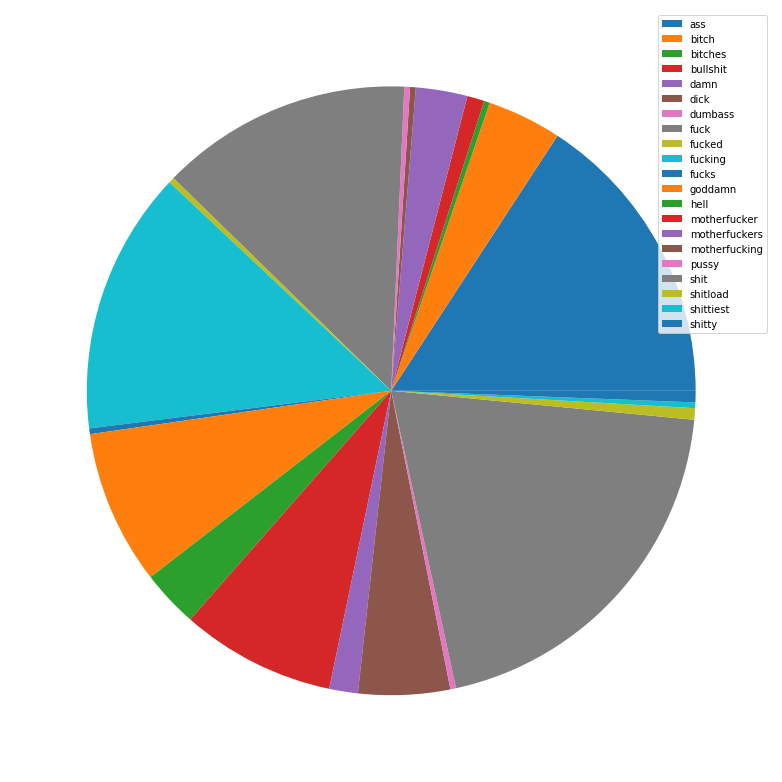

In [70]:
plt.figure(figsize = (14, 14))
x = jackie.Totals
plt.pie(x)
plt.legend(labels = jackie.word, loc='upper right')
plt.show()

### We have a winner, SHIT! 

## Ok now we will do Pulp Fiction!

In [71]:
fiction = pd.read_sql_query("SELECT word, COUNT(word) AS Totals FROM words WHERE movie = 'Pulp Fiction' GROUP BY word", con);

In [72]:
fiction

,word,Totals
0,ass,31
1,asses,3
2,asshole,3
3,assholes,1
4,bitch,15
5,bullshit,1
6,chickenshit,1
7,damn,6
8,damned,2
9,dickless,1


Text(0, 0.5, 'Total number of each word')

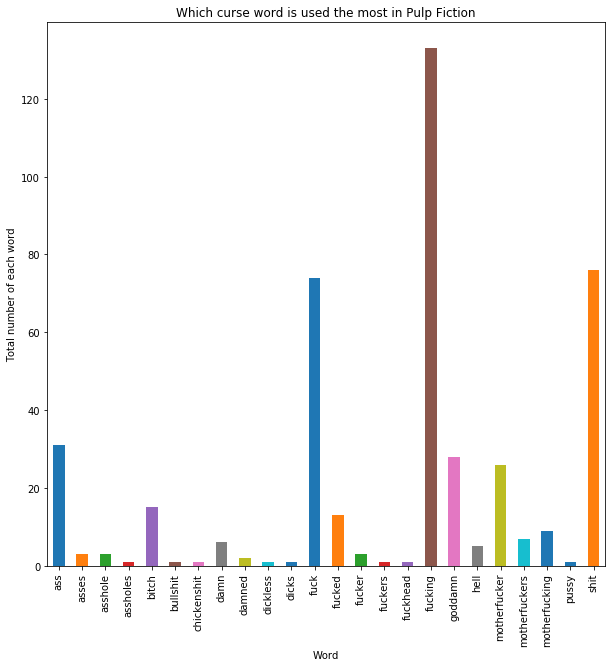

In [73]:
my_plot = fiction.plot(kind='bar', x='word', y='Totals', legend=None,title="Which curse word is used the most in Pulp Fiction", figsize=(10,10))
my_plot.set_xlabel("Word")
my_plot.set_ylabel("Total number of each word")


### DING, DING, DING, the winner is Fucking!!

# Ok, onto the next, Reservoir Dogs..... Predictions anyone?

In [74]:
dogs = pd.read_sql_query("SELECT word, COUNT(word) AS Totals FROM words WHERE movie = 'Reservoir Dogs' GROUP BY word", con);

In [75]:
dogs

,word,Totals
0,ass,13
1,asses,1
2,asshead,1
3,asshole,6
4,assholes,3
5,bastard,5
6,bitch,12
7,bitches,1
8,bullshit,9
9,cocksucker,1


Text(0, 0.5, 'Total number of each word')

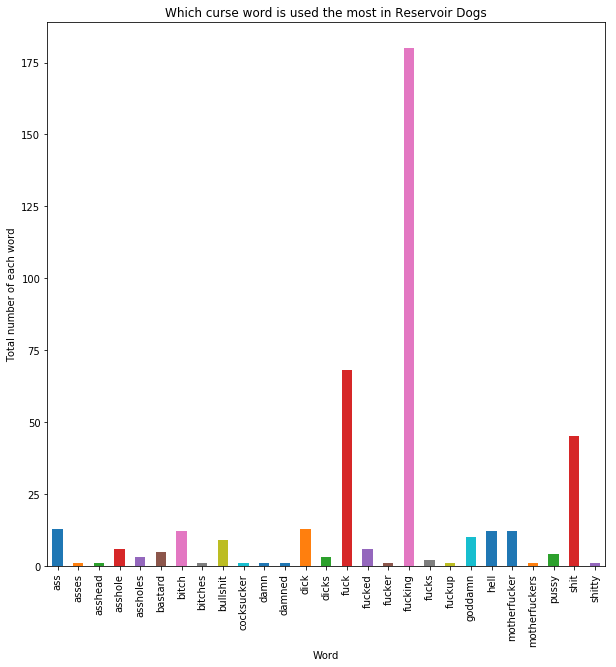

In [76]:
my_plot = dogs.plot(kind='bar', x='word', y='Totals', legend=None,title="Which curse word is used the most in Reservoir Dogs", figsize=(10,10))
my_plot.set_xlabel("Word")
my_plot.set_ylabel("Total number of each word")

## OH MY GOODNESS, Fucking AGAIN!! He sure LOVES that word. 

# Alright, a few more movies, and than maybe try something else out! Next is, 	Inglorious Basterds!

In [77]:
IG = pd.read_sql_query("SELECT word, COUNT(word) AS Totals FROM words WHERE movie = 'Inglorious Basterds' GROUP BY word", con);

In [78]:
IG

,word,Totals
0,ass,6
1,bitch,1
2,bitches,1
3,damn,4
4,fuck,11
5,fucker,1
6,fucking,9
7,goddamn,8
8,hell,4
9,shit,3


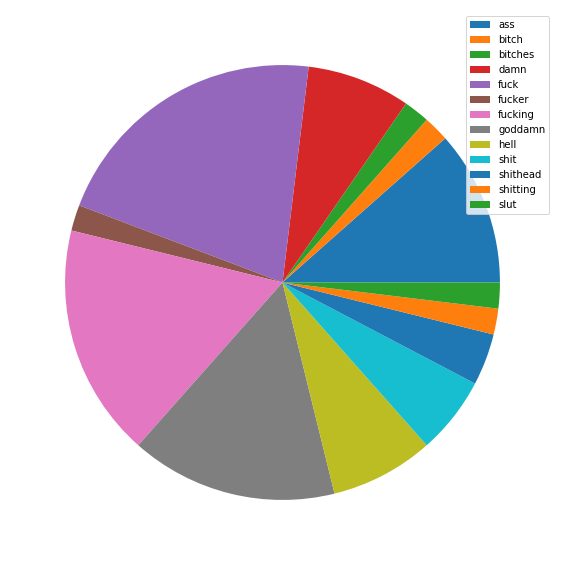

In [80]:
plt.figure(figsize = (10, 10))
x = IG.Totals
plt.pie(x)
plt.legend(labels = IG.word, loc='upper right')
plt.show()

### Awww fuck, literally fuck is the most used word in Inglorious. There wasnt nearly as many in this movie as the past few. 